In [44]:
import pandas as pd



df= pd.read_csv("concat.csv")
daf=df[['fields.gc_obo_type_c', 'fields.gc_obo_gare_origine_r_name','fields.date']]
daf.rename(columns={"fields.date":"date"},inplace=True)
daf.rename(columns={"fields.gc_obo_type_c":"type"},inplace=True)
daf.rename(columns={"fields.gc_obo_gare_origine_r_name":"nom_gare"},inplace=True)
# daf['date'] = daf['date'].str.slice(stop=10)
daf['saison']=daf['date'].apply(lambda x : x [5:10])
daf['date']=daf['date'].apply(lambda x : x [0:10])

# # # daf['date'] = pd.to_datetime(daf['date'])
daf['saison']=daf['saison'].str.replace("-","")
# # daf['date']=daf['date'][0].replace("0","")
# # daf['date']=daf['date'].apply(lambda x:x[0])
# # if daf['date'][0]=='0':
daf['saison'] = daf['saison'].apply(lambda x: x.lstrip('0') if x.startswith('0') else x)
daf['saison']=daf['saison'].astype('int')

def conversion_saison(date=int):
    if 321<=date <=620:
        return "printemps"
    elif 621<=date <=922:
        return "été"
    elif 923<=date <=1220:
        return "automne"
    elif 1221<=date<=1231 or 0<=date <=320:
        return "hiver"
#on met la saison
daf['saison']=daf['saison'].apply(conversion_saison)

#df_pays.to_sql(name='Pays', con=engine, if_exists = 'append', index=False)
# daf.to_sql(name='saison',con=engine, if_exists = 'append', index=False)

/tmp/ipykernel_43364/3701489946.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daf.rename(columns={"fields.date":"date"},inplace=True)
/tmp/ipykernel_43364/3701489946.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daf.rename(columns={"fields.gc_obo_type_c":"type"},inplace=True)
/tmp/ipykernel_43364/3701489946.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daf.rename(columns={"fields.gc_obo_gare_origine_r_name":"nom_gare"

In [45]:
import sqlite3

conn = sqlite3.connect('bddt.db')

# # Écriture du DataFrame dans une table SQL
daf.to_sql('saison', conn, if_exists='replace', index=False)

# # Fermeture de la connexion
conn.close()

In [52]:
import sqlite3 
import pandas as pd
import plotly.express as px
connexion=sqlite3.connect('bddt.db')
curseur= connexion.cursor()
    
curseur.execute("""
                    SELECT saison.saison, COUNT(objets_trouves.ID)
                    FROM objets_trouves
                    INNER JOIN saison ON saison.date = objets_trouves.data        
                    GROUP BY saison.saison
                    
                    """)
data=curseur.fetchall()
data

[('automne', 1473332),
 ('hiver', 1402401),
 ('printemps', 1285418),
 ('été', 1828151)]

In [51]:
import sqlite3 
import pandas as pd
import plotly.express as px
connexion=sqlite3.connect('bddt.db')
curseur= connexion.cursor()
    
curseur.execute("""
                    SELECT DISTINCT COUNT(objets_trouves.data)
                    FROM objets_trouves
                    INNER JOIN saison ON saison.date = objets_trouves.data        
                    GROUP BY saison.saison
                    
                    """)
datab=curseur.fetchall()
datab

[(1473332,), (1402401,), (1285418,), (1828151,)]

In [54]:
#### nombre de jours pour chaque saison
import sqlite3 
import pandas as pd
import plotly.express as px
connexion=sqlite3.connect('bddt.db')
curseur= connexion.cursor()
    
curseur.execute("""
                    SELECT saison.saison, COUNT(DISTINCT objets_trouves.data) AS nb_dates_differentes


                            FROM objets_trouves
                            INNER JOIN saison ON saison.date=objets_trouves.data
                            GROUP BY saison.saison;

                                                
                    """)
jour_saison=curseur.fetchall()
jour_saison[1]


('hiver', 358)

In [59]:
data

[('automne', 1473332),
 ('hiver', 1402401),
 ('printemps', 1285418),
 ('été', 1828151)]

In [60]:
jour_saison

[('automne', 356), ('hiver', 358), ('printemps', 338), ('été', 376)]

In [ ]:
                                #1 objets_trouves par saison

In [61]:
dict={}

for a,b in data:
    for i,j in jour_saison:
        if a==i:
            dict[a]=b/j
        continue
dict

{'automne': 4138.573033707865,
 'hiver': 3917.3212290502793,
 'printemps': 3803.0118343195268,
 'été': 4862.103723404255}

In [ ]:
#ici on ne voit pas de corrélation

                                                #1 temperature moyenne par saison

In [65]:
import sqlite3 
import pandas as pd
import plotly.express as px
connexion=sqlite3.connect('bddt.db')
curseur= connexion.cursor()
    
curseur.execute("""
                    SELECT saison.saison, AVG (meteo.temperature) AS tempi


                            FROM objets_trouves
                            INNER JOIN saison ON saison.date=objets_trouves.data
                            INNER JOIN meteo ON meteo.date =objets_trouves.data
                            GROUP BY saison.saison;

                                                
                    """)
temp=curseur.fetchall()
temp



[('automne', 10.99182804690321),
 ('hiver', 7.144766012003699),
 ('printemps', 14.113420692724079),
 ('été', 20.543414630410727)]

In [14]:

def conversion_saison(date=int):
    if 301<=date <=531:
        return "printemps"
    elif 601<=date <=831:
        return "été"
    elif 901<=date <=1130:
        return "automne"
    elif 1201<=date <=228:
        return "hiver"
    
    
daf.groupby(by="date")['']

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (700098523.py, line 12)

#1 Affichez le nombre d'objets trouvés en fonction du type de d'objet et de la saison sur un graphique. Il y a t il une correlation entre ces deux variables d'après le graphique?

In [71]:
connexion=sqlite3.connect('bddt.db')
curseur= connexion.cursor()
    
curseur.execute("""
                    SELECT saison.saison, objets_trouves.typo, COUNT(objets_trouves.id) AS nb_objets
                    FROM objets_trouves
                    JOIN saison ON objets_trouves.date_meteo = saison.date
                    GROUP BY objets_trouves.typo, saison.saison
                     
                    
                    """)
dernier=curseur.fetchall()
df.__dataframe__
dernier
dernier_df = pd.DataFrame(dernier, columns=['Saison', 'Catégorie', 'Nombre'])

In [85]:
a=dernier_df['Saison'].unique()
a

array(['automne', 'hiver', 'printemps', 'été'], dtype=object)

In [89]:
dernier_df.index

RangeIndex(start=0, stop=64, step=1)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

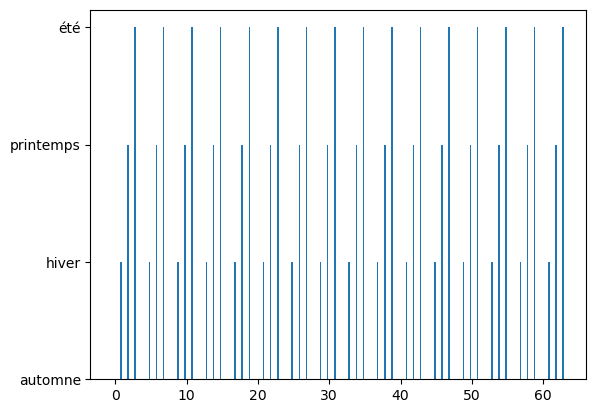

In [92]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(dernier_df.shape[0])  # the label locations
width = 0.2 


# On commence par déclarer une nouvelle figureégorie

plt.bar(x - width , dernier_df["Saison"], width, label="saison")
plt.bar(x + width , dernier_df["Catégorie"]/100 , width, label="type objets")


plt.xticks(ticks=x, labels=dernier_df.index)
plt.tick_params(axis='x',labelrotation=90.0)

plt.title("Nombre d'objets perdus selon saison")
plt.legend()
plt.show()

In [ ]:
o = [('automne',
  'Appareils électroniques, informatiques, appareils photo',
  234535),
 ('hiver', 'Appareils électroniques, informatiques, appareils photo', 226080),
 ('printemps',
  'Appareils électroniques, informatiques, appareils photo',
  207647),
 ('été', 'Appareils électroniques, informatiques, appareils photo', 268237),
 ('automne', "Articles d'enfants, de puériculture", 8589),
 ('hiver', "Articles d'enfants, de puériculture", 10881),
 ('printemps', "Articles d'enfants, de puériculture", 8336),
 ('été', "Articles d'enfants, de puériculture", 17864),
 ('automne', 'Articles de sport, loisirs, camping', 7440),
 ('hiver', 'Articles de sport, loisirs, camping', 8916),
 ('printemps', 'Articles de sport, loisirs, camping', 6836),
 ('été', 'Articles de sport, loisirs, camping', 21137),
 ('automne', 'Articles médicaux', 7318),
 ('hiver', 'Articles médicaux', 7777),
 ('printemps', 'Articles médicaux', 7079),
 ('été', 'Articles médicaux', 7813)]



In [ ]:
dernier_df = pd.DataFrame( [('automne', "Articles d'enfants, de puériculture", 8589),
 ('hiver', "Articles d'enfants, de puériculture", 10881),
 ('printemps', "Articles d'enfants, de puériculture", 8336),
 ('été', "Articles d'enfants, de puériculture", 17864),
 ('automne', 'Articles de sport, loisirs, camping', 7440),
 ('hiver', 'Articles de sport, loisirs, camping', 8916),
 ('printemps', 'Articles de sport, loisirs, camping', 6836),
 ('été', 'Articles de sport, loisirs, camping', 21137),
 ('automne', 'Articles médicaux', 7318),
 ('hiver', 'Articles médicaux', 7777),
 ('printemps', 'Articles médicaux', 7079),
 ('été', 'Articles médicaux', 7813)], columns=['Saison', 'Catégorie', 'Nombre'])

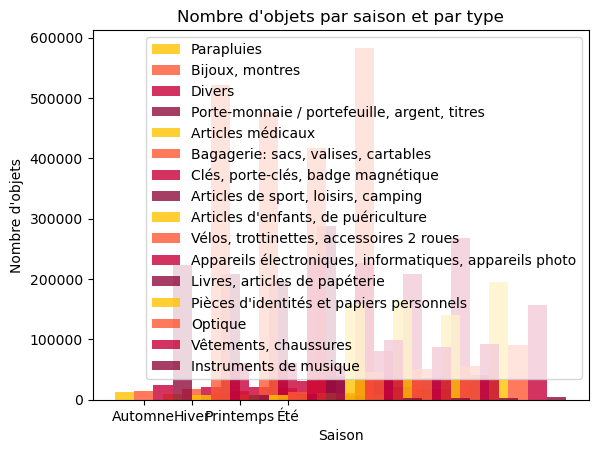

In [88]:
import matplotlib.pyplot as plt
import numpy as np

# Créer un dictionnaire pour stocker les nombres de chaque type d'objet pour chaque saison
data = {}
for saison in ['automne', 'hiver', 'printemps', 'été']:
    data[saison] = []
    for objet in set([x[1] for x in dernier]):
        objets_saison = [x[2] for x in dernier if x[0] == saison and x[1] == objet]
        if objets_saison:
            data[saison].append(sum(objets_saison))
        else:
            data[saison].append(0)

# Créer les barres groupées
n_seasons = len(data)
bar_width = 0.4
opacity = 0.8
colors = ['#FFC300', '#FF5733', '#C70039', '#900C3F']
index = np.arange(n_seasons)
for i, objet in enumerate(set([x[1] for x in dernier])):
    plt.bar(index + i*bar_width, [data[saison][i] for saison in data], bar_width,
            alpha=opacity, color=colors[i%4], label=objet)

# Personnaliser le graphique
plt.xlabel('Saison')
plt.ylabel('Nombre d\'objets')
plt.title('Nombre d\'objets par saison et par type')
plt.xticks(index + bar_width, ['Automne', 'Hiver', 'Printemps', 'Été'])
plt.legend()

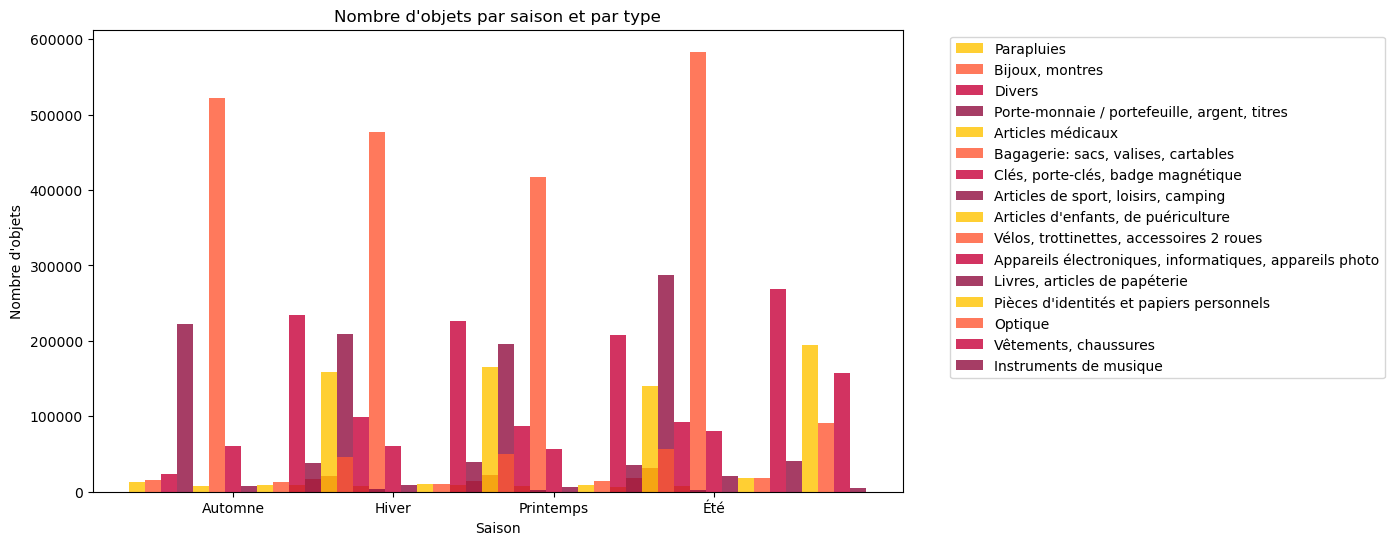

In [96]:
import matplotlib.pyplot as plt
import numpy as np

# Créer un dictionnaire pour stocker les nombres de chaque type d'objet pour chaque saison
data = {}
for saison in ['automne', 'hiver', 'printemps', 'été']:
    data[saison] = []
    for objet in set([x[1] for x in dernier_df.values]):
        objets_saison = [x[2] for x in dernier_df.values if x[0] == saison and x[1] == objet]
        if objets_saison:
            data[saison].append(sum(objets_saison))
        else:
            data[saison].append(0)

# Créer les barres groupées
n_seasons = len(data)
bar_width = 0.1
opacity = 0.8
colors = ['#FFC300', '#FF5733', '#C70039', '#900C3F', ]
index = np.arange(n_seasons)
for i, objet in enumerate(set([x[1] for x in dernier_df.values])):
    plt.bar(index + i*bar_width, [data[saison][i] for saison in data], bar_width,
            alpha=opacity, color=colors[i%4], label=objet)

# Personnaliser le graphique
plt.xlabel('Saison')
plt.ylabel('Nombre d\'objets')
plt.title('Nombre d\'objets par saison et par type')
plt.xticks(index + bar_width*6, ['Automne', 'Hiver', 'Printemps', 'Été'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplots_adjust(right=0.8)
plt.gcf().set_size_inches(12, 6)
plt.show()

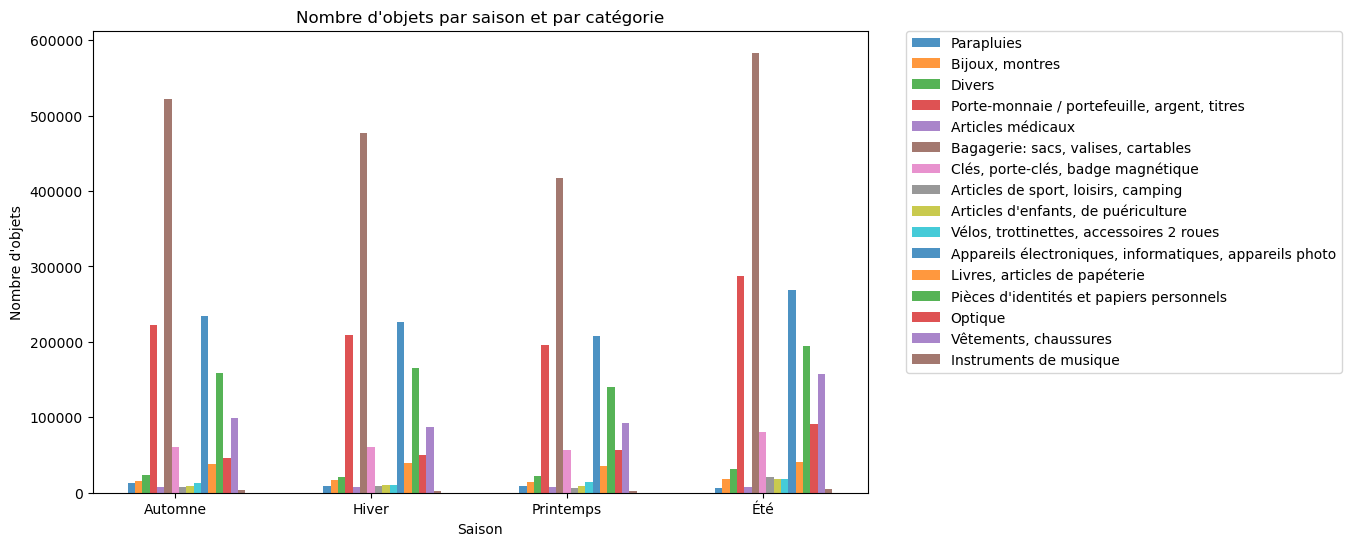

In [99]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Créer un dictionnaire pour stocker les nombres de chaque type d'objet pour chaque saison
data = {}
categories = set([x[1] for x in dernier])
#là t'as une liste de toutes les catégories qui ont été créé
n_categories = len(categories)
#reprend le nombre de types différent d'objets
palette = sns.color_palette(n_colors=n_categories)
#on demande une couleur pr chaque entité de catégorie
for saison in ['automne', 'hiver', 'printemps', 'été']:
    data[saison] = []
    #on crée une nouvelle clé (ds le dico "data" pr chaque saison)
    for categorie in categories:
        #on itére sur chaque catégorie à partir de la saison>> [ex: automne-appareil photo puis jouet etc]
        objets_saison = [x[2] for x in dernier if x[0] == saison and x[1] == categorie]
        #x[2]>> correspond au nombre d'objets pr chaque cat
        #ainsi si [x catégorie] = saison qu'on itére T0, et à la catégorie, on l'ajoute à la liste 
        #on itére sur chaque ligne: 
        # if objets_saison:
        data[saison].append(sum(objets_saison))
        #on fait la somme du nbre d'objets de la liste de automne/jouets (par ex)
       
        # else:
        #     data[saison].append(0)

# Créer les barres groupées
n_seasons = len(data)
bar_width = 0.6 / n_categories
opacity = 0.8
index = np.arange(n_seasons)
#variable est utilisée pour positionner les barres sur l'axe des x lors de la création du graphique à barres
for i, categorie in enumerate(categories):
    plt.bar(index + i*bar_width, [data[saison][i] for saison in data], bar_width,
            alpha=opacity, color=palette[i], label=categorie)

# Personnaliser le graphique
plt.xlabel('Saison')
plt.ylabel('Nombre d\'objets')
plt.title('Nombre d\'objets par saison et par catégorie')
plt.xticks(index + bar_width*6, ['Automne', 'Hiver', 'Printemps', 'Été'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.gcf().set_size_inches(10, 6)
plt.show()

In [ ]:
# 